# Tamang's Big Data Final Project

In [0]:
# get text data from url

import urllib.request
stringInURL = "https://www.gutenberg.org/cache/epub/14255/pg14255.txt"

urllib.request.urlretrieve(stringInURL, "/tmp/love.txt")

Out[48]: ('/tmp/love.txt', <http.client.HTTPMessage at 0x7f69ac518220>)

In [0]:
dbutils.fs.mv("file:/tmp/love.txt","dbfs:/data/love.txt")

Out[49]: True

In [0]:
LoverawRDD = sc.textFile("dbfs:/data/love.txt")

In [0]:
#flatmap each line to words
loveTokenRDD=LoverawRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# remove punctuation
import re
loveCleanTokensRDD = loveTokenRDD.map(lambda w: re.sub(r'[^a-zA-Z]' , '',w))

In [0]:
#filter out stopwords
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()

In [0]:
loveWordsRDD = loveCleanTokensRDD.filter(lambda w: w not in stopwords)

In [0]:
# map words to (word,1) intermediate key value pairs

loveWordsEmptyRemoveRDD = loveWordsRDD.filter(lambda words: words != "")

In [0]:
# Prepare to clean stopwords

loveWordsPairRDD = loveWordsEmptyRemoveRDD.map(lambda word: (word,1))

loveWordsCountRDD = loveWordsPairRDD.reduceByKey(lambda x,y: x+y)

loveWordsResults = loveWordsCountRDD.map(lambda word: (word[1],word[0])).sortByKey(False).take(10)
print(loveWordsResults)

[(435, 'woman'), (377, 'man'), (364, 'love'), (181, 'women'), (168, 'one'), (151, 'heart'), (140, 'men'), (135, 'yet'), (127, 'may'), (87, 'project')]

Out[57]:

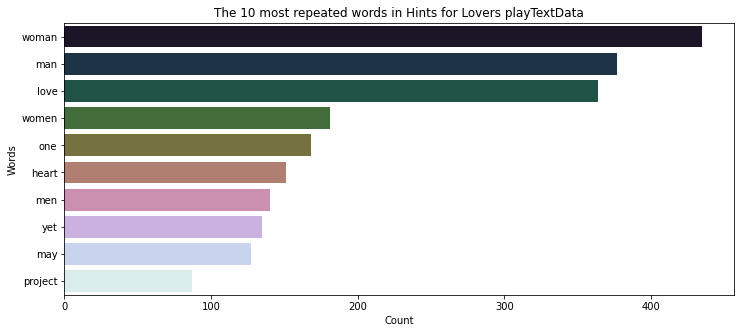

Text(0.5, 1.0, 'The 10 most repeated words in Hints for Lovers playTextData')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'TextData'
title = 'The 10 most repeated words in Hints for Lovers play' + source
xlabel = 'Count'
ylabel = 'Words'

df = pd.DataFrame.from_records(loveWordsResults, columns = [xlabel,ylabel])
plt.figure(figsize=(12,5))
sns.barplot(xlabel,ylabel, data=df, palette = "cubehelix").set_title(title)